# eQTL chr13 overlapping mQTL chr13

Table of eQTLs (cis and trans) overlapping the mQTL hotspot on chr13

In [3]:
.libPaths("~/R/x86_64-redhat-linux-gnu-library/3.2/")
# config opts and libraries
options(repr.plot.width = 6)
options(repr.plot.height = 5)
library(ggplot2);
library(plyr);
library(dplyr);
library(reshape2);
library(LSD);
library(pheatmap);
library(parallel);
options(mc.cores = 24);
library(stringr);
library(RColorBrewer);
library(qtl);


Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Warning message:
: package ‘qtl’ was built under R version 3.2.3

In [4]:
# load mQTLs
load("/g/steinmetz/brooks/genphen//metabolome/qtls/mQTLs_comball_funqtl_2014.rda")
mQTLs_funqtl_2014_class = sapply(mQTLs_funqtl_2014,class)
mQTLs_funqtl_2014 = mQTLs_funqtl_2014[mQTLs_funqtl_2014_class!="try-error"]

In [28]:
# load eQTLs
load("/g/steinmetz/brooks/genphen/transcriptome/qtl/eQTL_08032016.rda")

In [6]:
# load transcript annotation
load("/g/steinmetz/brooks/genphen/transcriptome/data/trx_df.rda")

In [8]:
# load genotype and markers files
genotype_f = "/g/steinmetz/brooks/yeast/genomes/S288CxYJM789/genotypes_S288c_R64.rda"
load(genotype_f)

In [30]:
# chr13 mQTL interval, 24134::169765
# metabolites: AKG, GLY, HSE, LEU, MET, PYR

mQTL_start = 24134
mQTL_end = 169765
chr13_eQTL = eQTL_table %>% filter(seqnames == "chrXIII", 
                                 (start <= mQTL_start && end <= mQTL_end ) |
                                 (start >= mQTL_start && end <= mQTL_end) | 
                                 (start >= mQTL_start && end >= mQTL_end) |
                                 (start <= mQTL_start && end >= mQTL_end))
#thisstartend = .$start, .$end
#start >= mQTL_start | end <= mQTL_end )

In [31]:
cat("Number of eQTLs colocalizaed with mQTL on chr13:", dim(chr13_eQTL)[1])

Number of eQTLs colocalizaed with mQTL on chr13: 132

In [32]:
cat("Number of transcripts with at least one eQTL colocalizaed with mQTL on chr13:", 
    length(levels(chr13_eQTL$gene)[chr13_eQTL$gene]))

Number of transcripts with at least one eQTL colocalizaed with mQTL on chr13: 132

In [33]:
genes_chr13 = trx_df %>% filter(chr == "chr13")
genes_notchr13 = trx_df %>% filter(name %in% setdiff(trx_df$name, genes_chr13$name))

In [34]:
chr13_CISeQTL = chr13_eQTL %>% filter(gene %in% genes_chr13$name)
chr13_CISeQTL = chr13_CISeQTL[order(chr13_CISeQTL$start,decreasing = F),]
chr13_TRANSeQTL = chr13_eQTL %>% filter(gene %in% genes_notchr13$name)
chr13_TRANSeQTL = chr13_TRANSeQTL[order(chr13_TRANSeQTL$maxlod,decreasing = T),]

In [35]:
head(chr13_CISeQTL)

,gene,seqnames,start,end,width,strand,maxlod,maxmrk
5,YML091C,chrXIII,9746,169814,160069,*,4.468042,mrk_37116
28,YML121W,chrXIII,9746,845058,835313,*,3.511824,mrk_37157
61,YMR215W,chrXIII,9746,915435,905690,*,3.350485,mrk_37037
17,YMR205C,chrXIII,22768,214914,192147,*,3.766641,mrk_37745
1,YML123C,chrXIII,24997,138066,113070,*,3.788935,mrk_37075
34,SUT290,chrXIII,30303,169814,139512,*,3.446727,mrk_37404


In [36]:
head(chr13_TRANSeQTL)

,gene,seqnames,start,end,width,strand,maxlod,maxmrk
53,YPL111W,chrXIII,53532,113893,60362,*,13.39892,mrk_37369
35,YLR438W,chrXIII,34473,146101,111629,*,8.292216,mrk_37188
7,YCL064C,chrXIII,44287,63905,19619,*,7.674525,mrk_37138
45,YOL058W,chrXIII,87655,142704,55050,*,7.345598,mrk_37409
49,CUT876,chrXIII,879141,917493,38353,*,6.985436,mrk_41257
30,YJR095W,chrXIII,535737,614170,78434,*,6.025723,mrk_39457


In [37]:
cat("Number of cis-eQTLs colocalizaed with mQTL on chr13:", dim(chr13_CISeQTL)[1])

Number of cis-eQTLs colocalizaed with mQTL on chr13: 73

In [38]:
cat("Number of trans-eQTLs colocalizaed with mQTL on chr13:", dim(chr13_TRANSeQTL)[1])

Number of trans-eQTLs colocalizaed with mQTL on chr13: 53

In [39]:
cat(paste(chr13_TRANSeQTL$gene, collapse="\n"))

YPL111W
YLR438W
YCL064C
YOL058W
CUT876
YJR095W
YPL095C
SUT764
YIL051C
YGL162W
YGR288W
YBR067C
YBR069C
YIL088C
YDL181W
YNL163C
YDR502C
YOL038W
YOR375C
YOR273C
YOR133W
YBR169C
YGR197C
YJL116C
YLL028W
SUT566
YGR035C
YPR098C
SUT015
YNL077W
YNL029C
YHR128W
YAL062W
SUT066
CUT494
snR4
snR190
YOL152W
CUT124
YOR315W
CUT122
YDR046C
snR13
YIL155C
YJR040W
SUT243
YBR208C
YDR348C
CUT756
YPR016C
YOL094C
CUT224
CUT813

### Is Bul2 (YML111W) a QTL gene?

In [40]:
"YML111W" %in% chr13_CISeQTL$gene

[1] TRUE

In [41]:
filter(chr13_eQTL, gene == "YML111W")

,gene,seqnames,start,end,width,strand,maxlod,maxmrk
1,YML111W,chrXIII,45908,170785,124878,*,3.732769,mrk_37242


### How many peaks are within x markers of putative BUL2 polymorphism?

In [42]:
bul2_mrk = 37132
mrks = as.numeric(sapply(chr13_eQTL$maxmrk,function(i){strsplit(i,split="_")[[1]][2]}))
mrks = data.frame(gene = chr13_eQTL$gene, maxmrk = mrks)
distance = 100
bul2_associated_mrks = mrks %>% filter(maxmrk %in% seq((bul2_mrk-distance),(bul2_mrk+distance)))
bul2_associated_mrks$mrkdist = abs(bul2_associated_mrks$maxmrk-bul2_mrk)
bul2_associated_mrks[order(bul2_associated_mrks$mrkdist,decreasing = F),]

,gene,maxmrk,mrkdist
3,YCL064C,37138,6
16,YML112W,37140,8
11,CUT758,37144,12
14,YML091C,37116,16
12,SUT716,37151,19
5,YDR502C,37157,25
15,YML121W,37157,25
2,SUT015,37097,35
13,YML103C,37171,39
8,YIL051C,37172,40


## trans-QTL assocation with chr13 mQTL

In [43]:
chr13_CISeQTL_genes = chr13_eQTL %>% filter(!gene %in% chr13_CISeQTL$gene)

In [44]:
head(genes_notchr13)

,strain,rep,name,type,chr,start,end,strand,value
1,14C,biorep1,SUT432,SUTs,chr01,4875,5275,-,196.7108
2,17C,biorep1,SUT432,SUTs,chr01,4875,5275,-,125.5987
3,17D,biorep1,SUT432,SUTs,chr01,4875,5275,-,4.924066
4,18C,biorep1,SUT432,SUTs,chr01,4875,5275,-,0
5,18D,biorep1,SUT432,SUTs,chr01,4875,5275,-,0
6,19C,biorep1,SUT432,SUTs,chr01,4875,5275,-,0


### 9 genes with trans-eQTL are enriched for amino acid biosynthetic process (p = 7.7 e-3)

Of these 6 are enriched for glutamine family amino acid metablitc process (p = 0.013)

In [45]:
aa_genes = c("YAL062W,YBR208C,YCL064C,YDL181W,YDR502C,YIL051C,YLR438W,YOL058W,YOR375C,YPL111W")
aa_genes = strsplit(aa_genes, ",")[[1]]

arg_genes = c("YBR208C,YLR438W,YOL058W,YPL111W")
arg_genes = strsplit(arg_genes, ",")[[1]]

In [46]:
genotype = geno[bul2_mrk,]
genotype[genotype==1] = "S"
genotype[genotype==2] = "Y"
genotype = data.frame(strain = names(genotype), geno = genotype)

trx2plot = merge(trx_df,genotype,by = "strain")
trx2plot = trx2plot[!is.na(trx2plot$geno),]

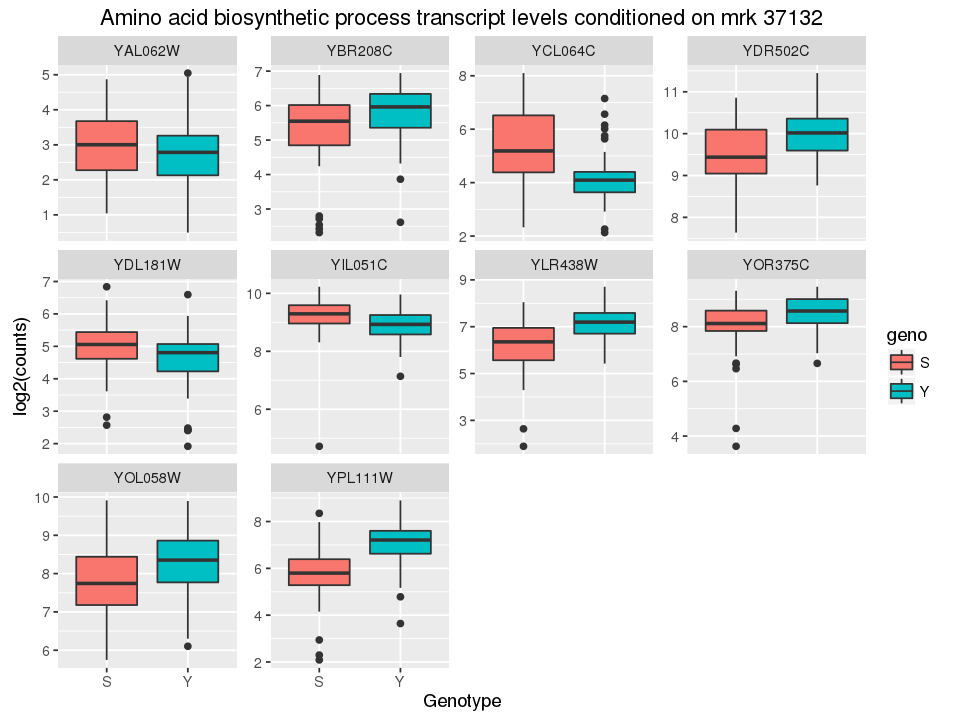

In [47]:
options(repr.plot.width = 8)
options(repr.plot.height = 6)
# average replicates
trx2plot_aa = trx2plot  %>% filter(name %in% aa_genes) %>% group_by(name, strain) %>% do({
        data.frame(value = median(log2(.$value+1), na.rm =T), geno = .$geno[1])
     })

p <- ggplot(trx2plot_aa, aes(geno, value)) + 
    geom_boxplot(aes(fill = geno), show.legend = T) +
    facet_wrap(~ name, ncol = 4, scales = "free_y") + 
    labs(title = paste("Amino acid biosynthetic process transcript levels conditioned on mrk", bul2_mrk), 
         y = "log2(counts)", x = "Genotype")

p

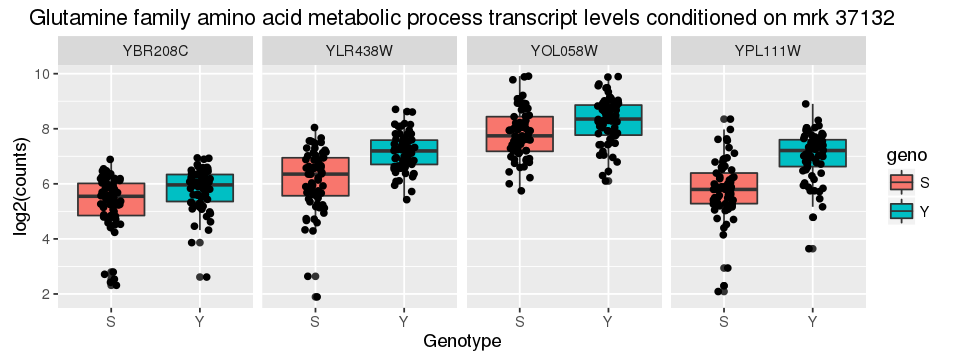

In [49]:
options(repr.plot.width = 8)
options(repr.plot.height = 3)
# average replicates
trx2plot_arg = trx2plot  %>% filter(name %in% arg_genes) %>% group_by(name, strain) %>% do({
        data.frame(value = median(log2(.$value+1), na.rm =T), geno = .$geno[1])
     })

p <- ggplot(trx2plot_arg, aes(geno, value)) + 
    geom_boxplot(aes(fill = geno), show.legend = T) +
    geom_jitter(width = 0.3) +
    facet_wrap(~ name, ncol = 4) + 
    labs(title = paste("Glutamine family amino acid metabolic process transcript levels conditioned on mrk", bul2_mrk), 
         y = "log2(counts)", x = "Genotype")

p